In [1]:
import pandas as pd

df = pd.read_csv("../../Data/SMTO_2019/SMTO_2019_Travel_Diary.csv")
df.head()

,UniquePsKey_,PsKey_,TpNum_,TpOrigTTS2006,TpOrigPD,TpOrigRegion,TpDestTTS2006,TpDestPD,TpDestRegion,cmpmultimodecatkey,...,TpStartTimeExt,tpmodes,tpnumuniquemodes,single_tripdiary_flag,incomplete_diary,institution,est_trip_travel_Time,est_error_flag,est_straightline_distance,est_network_distance
0,2,11,1,181.0,4.0,1.0,458.0,11.0,1.0,6,...,730,"Transit Bus,Transit Bus,Transit Bus",1.0,0,0,Centennial College,2625,0,7006,9048
1,2,11,2,458.0,11.0,1.0,182.0,4.0,1.0,6,...,1600,"Transit Bus,Subway/RT,Transit Bus",2.0,0,0,Centennial College,2548,0,7779,9737
2,2,11,3,182.0,4.0,1.0,181.0,4.0,1.0,6,...,1830,"Transit Bus,Transit Bus",1.0,0,0,Centennial College,1111,0,1263,1533
3,3,14,1,1039.0,20.0,2.0,493.0,13.0,1.0,6,...,1220,"Transit Bus,GO Bus",2.0,0,0,Centennial College,2946,0,14112,16524
4,3,14,2,493.0,13.0,1.0,1039.0,20.0,2.0,11,...,2100,"GO Bus,Car passenger (driver is a household me...",2.0,0,0,Centennial College,2677,0,14112,16524


In [2]:
print("\t Rows\t % of Students\t\t Trips/Student")
print("Before\t", df.shape[0], "\t", len(df['UniquePsKey_'].unique())/19135, "\t", df.shape[0] / len(df['UniquePsKey_'].unique()))
df = df[df['incomplete_diary'] != 1]  # Remove 405 rows with incomplete diaries as identified by SMTO (e.g. never return home)
print("After\t", df.shape[0], "\t", len(df['UniquePsKey_'].unique())/19135, "\t", df.shape[0] / len(df['UniquePsKey_'].unique()))

	 Rows	 % of Students		 Trips/Student
Before	 19229 	 0.41228116017768485 	 2.437444543034605
After	 18824 	 0.3935197282466684 	 2.499867197875166


In [3]:
df['single_tripdiary_flag'].value_counts()

0    16497
1     2327
Name: single_tripdiary_flag, dtype: int64

In [4]:
df['TpNum_'].value_counts()

1     7530
2     5203
3     2876
4     1664
5      810
6      402
7      180
8       87
9       44
10      19
11       6
12       2
13       1
Name: TpNum_, dtype: int64

In [5]:
df['institution'].value_counts(normalize=True)
# Compare to sample-wide distribution?

University of Toronto      0.367563
Ryerson University         0.193423
York University            0.112994
McMaster University        0.110657
Sheridan College           0.047864
Centennial College         0.040905
Durham College             0.037133
Ontario Tech University    0.035540
Mohawk College             0.029006
OCAD University            0.024915
Name: institution, dtype: float64

In [6]:
df['cmpmultimodecatname'].value_counts()

Transit                                                            6418
Walk                                                               4472
Car driving alone                                                  2770
Car driving with passenger(s) (household members only)             1433
Car passenger (driver is a household member)                       1034
Car passenger (driver is a non-household member)                    555
Car driving with passenger(s) (including non-household members)     534
Cycling (personal bike)                                             498
K+R                                                                 300
P+R                                                                 295
Ridehailing alone                                                   241
Cycling (bikeshare)                                                  66
Ridehailing with other passengers                                    53
Other                                                           

In [7]:
df['cmpmultimodecatmaingroup'].value_counts()

Transit         6418
Car driving     4737
Walk            4472
Car passager    1589
P&R/K&R/R&R      614
Cycling          564
Other modes      430
Name: cmpmultimodecatmaingroup, dtype: int64

In [8]:
print(df['tpmainptmode'].value_counts().sum())
df['tpmainptmode'].value_counts()

7070


Subway       3202
Bus          2181
GO Bus        705
GO Train      611
Streetcar     371
Name: tpmainptmode, dtype: int64

In [9]:
df.TpOriPurp.value_counts()

home                                                                                  7921
education (including TA/RA work)                                                      3703
shopping and errands (groceries, corner store, shopping center, gas station, etc.)    1399
usual work location                                                                   1367
restaurant, bar, coffee                                                                943
visiting friends, family                                                               869
recreation, sports, leisure, arts                                                      736
other                                                                                  542
work-related/business meeting                                                          523
health and personal care                                                               243
drop someone off                                                                       207

In [10]:
df.TpDestPurp.value_counts()

home                                                                                  6101
education (including TA/RA work)                                                      4443
usual work location                                                                   1656
shopping and errands (groceries, corner store, shopping center, gas station, etc.)    1558
visiting friends, family                                                              1039
restaurant, bar, coffee                                                               1032
recreation, sports, leisure, arts                                                      830
work-related/business meeting                                                          650
other                                                                                  631
health and personal care                                                               268
pick someone up                                                                        218

In [11]:
df[(df['TpOriPurp'] == 'home') & (df['TpDestPurp'] == 'education (including TA/RA work)')].shape[0]

3452

In [12]:
df[(df['TpOriPurp'] == 'home') & (df['TpDestPurp'] == 'education (including TA/RA work)')].shape[0] / 18824

0.18338291542711432

In [13]:
df[(df['TpOriPurp'] == 'education (including TA/RA work)') & (df['TpDestPurp'] == 'home')].shape[0]

2100

In [14]:
df[(df['TpOriPurp'] == 'education (including TA/RA work)') & (df['TpDestPurp'] == 'home')].shape[0] / 18824

0.11155971100722482

In [15]:
temp = df[(df['TpOriPurp'] == 'education (including TA/RA work)') & (df['TpDestPurp'] == 'education (including TA/RA work)')]
temp.shape[0], (temp['TpOrigTTS2006'] == temp['TpDestTTS2006']).sum()

(379, 138)

In [16]:
df['TpDayExt'].value_counts()

Tue    3231
Mon    3231
Sun    2930
Wed    2897
Thu    2468
Fri    2133
Sat    1934
Name: TpDayExt, dtype: int64

In [17]:
df[(df['TpOriPurp'] == 'home') & (df['TpDestPurp'] == 'education (including TA/RA work)')]['TpDayExt'].value_counts()

Tue    753
Mon    730
Wed    659
Thu    579
Fri    410
Sun    193
Sat    128
Name: TpDayExt, dtype: int64

In [18]:
df['tpnumuniquemodes'].value_counts()

1.0    15380
2.0     2639
3.0      767
4.0       31
5.0        2
Name: tpnumuniquemodes, dtype: int64

In [19]:
df['tpmodes'].str.split(',').str.len().value_counts()

1.0    14065
2.0     2772
3.0     1605
4.0      337
5.0       36
6.0        4
Name: tpmodes, dtype: int64

In [21]:
df.head()

,UniquePsKey_,PsKey_,TpNum_,TpOrigTTS2006,TpOrigPD,TpOrigRegion,TpDestTTS2006,TpDestPD,TpDestRegion,cmpmultimodecatkey,...,TpStartTimeExt,tpmodes,tpnumuniquemodes,single_tripdiary_flag,incomplete_diary,institution,est_trip_travel_Time,est_error_flag,est_straightline_distance,est_network_distance
0,2,11,1,181.0,4.0,1.0,458.0,11.0,1.0,6,...,730,"Transit Bus,Transit Bus,Transit Bus",1.0,0,0,Centennial College,2625,0,7006,9048
1,2,11,2,458.0,11.0,1.0,182.0,4.0,1.0,6,...,1600,"Transit Bus,Subway/RT,Transit Bus",2.0,0,0,Centennial College,2548,0,7779,9737
2,2,11,3,182.0,4.0,1.0,181.0,4.0,1.0,6,...,1830,"Transit Bus,Transit Bus",1.0,0,0,Centennial College,1111,0,1263,1533
3,3,14,1,1039.0,20.0,2.0,493.0,13.0,1.0,6,...,1220,"Transit Bus,GO Bus",2.0,0,0,Centennial College,2946,0,14112,16524
4,3,14,2,493.0,13.0,1.0,1039.0,20.0,2.0,11,...,2100,"GO Bus,Car passenger (driver is a household me...",2.0,0,0,Centennial College,2677,0,14112,16524


In [22]:
df['est_error_flag'].value_counts()

0    18039
2      482
1      174
5       76
4       37
3       16
Name: est_error_flag, dtype: int64

In [26]:
df2 = df[df['est_error_flag'] == 0]
df2.columns

Index(['UniquePsKey_', 'PsKey_', 'TpNum_', 'TpOrigTTS2006', 'TpOrigPD',
       'TpOrigRegion', 'TpDestTTS2006', 'TpDestPD', 'TpDestRegion',
       'cmpmultimodecatkey', 'cmpmultimodecatname', 'cmpmultimodecatmaingroup',
       'TpInclDriv', 'TpInclPass', 'TpInclPT', 'TpInclWalk', 'TpInclBike',
       'TpInclOtherMode', 'tpmainptmode', 'TpInclPTBus', 'TpInclPTStreetcar',
       'TpInclPTSubway', 'TpInclPTGOBus', 'TpInclPTGOTrain', 'TpOriPurp',
       'TpDestPurp', 'TpDateExt', 'TpDayExt', 'TpStartTimeExt', 'tpmodes',
       'tpnumuniquemodes', 'single_tripdiary_flag', 'incomplete_diary',
       'institution', 'est_trip_travel_Time', 'est_error_flag',
       'est_straightline_distance', 'est_network_distance'],
      dtype='object')

In [67]:
import matplotlib.pyplot as plt

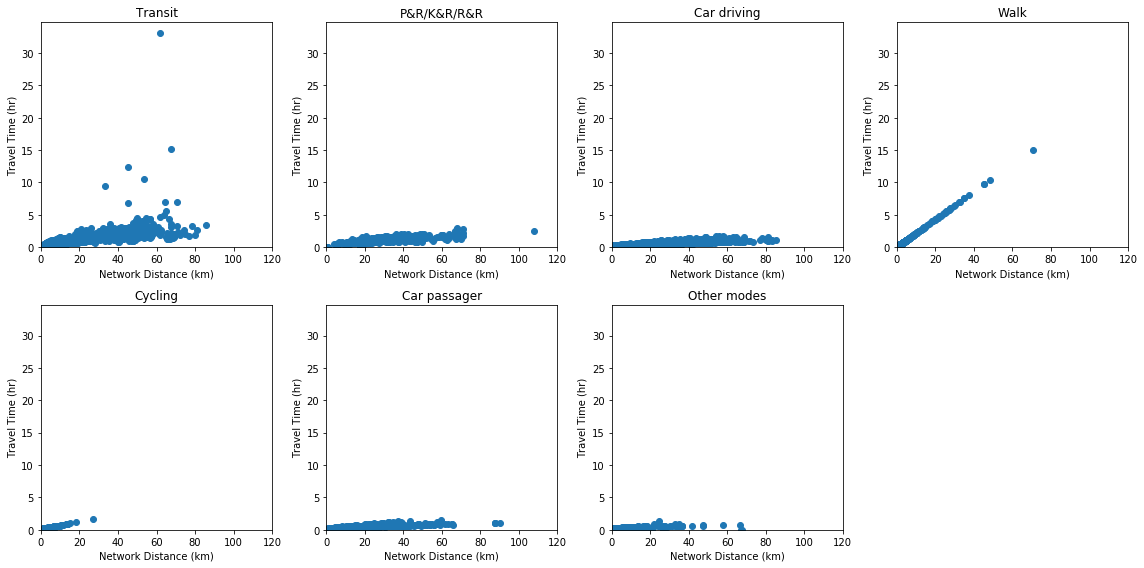

In [69]:
plt.figure(figsize=(16, 8))
modes = df2['cmpmultimodecatmaingroup'].unique()
for i in range(len(modes)):
    temp = df2[df2['cmpmultimodecatmaingroup'] == modes[i]]
    plt.subplot(2, 4, i + 1)
    plt.tight_layout()
    plt.scatter(temp['est_network_distance']/1000, temp['est_trip_travel_Time']/3600)
    plt.title(modes[i])
    plt.xlabel('Network Distance (km)')
    plt.ylabel('Travel Time (hr)')
    plt.xlim(0, 120)
    plt.ylim(0, 125000/3600)

Several notes:

- The trends for walking and cycling appear very close to linear, but not exactly.  
- The travel times for transit include many outliers and are generally quite high.  
- The estimated network distanced for the cycling trips seem mostly reasonable, but many walking trips are unreasonably long.

In [65]:
import numpy as np
print('Mode\t\tSpeed (km/hr)\t\tY-int')
for mode in modes:
    temp = df2[df2['cmpmultimodecatmaingroup'] == mode]
    x = np.array(temp['est_trip_travel_Time']/3600)
    y = np.array(temp['est_network_distance']/1000)
    m, b = np.polyfit(x, y, 1)
    print(mode[:11] + "    \t" + str(m) + "\t" + str(b))

Mode		Speed (km/hr)		Y-int
Transit    	11.788204193002509	2.668431089452586
P&R/K&R/R&R    	24.675783786841585	2.5815247025673447
Car driving    	55.89980794745344	-7.85292701364034
Walk    	4.654361618104284	-0.041585090103952546
Cycling    	16.15274582820546	-1.1854353399837934
Car passage    	55.68084754788573	-8.170723430415638
Other modes    	41.339234099034854	-3.310834427629776


Interesting is that walking and cycling speeds were not set to 4km/h and 15km/h respectively. Also, transit speeds were significantly slower than expected, though this may have been influenced by the outliers.